# CNN image classifier (cifar10)
---
week 3-2 

                                                                           written by Yang, So young
                                                                                     2017.07.19 v1.0
                                                                                     2017.07.20 v1.1
                                                                                     2017.07.21 v1.2
                                                                                     2017.08.08 v1.3
                                                                                     
1. import
2. load data
3. widget - parameters
4. tensorflow : graphing
5. tensorflow : Session().run
6. plot : prediction with corrects

---
## CNN

reference : 
- [cnn in udacity deep-learning](https://www.youtube.com/watch?v=jajksuQW4mc&list=PLAwxTw4SYaPn_OWPFT9ulXLuQrImzHfOV&index=37) 
- [cnn2 in udacity deep-learning](https://www.youtube.com/watch?v=Fif8uipYuHE&list=PLAwxTw4SYaPn_OWPFT9ulXLuQrImzHfOV&index=39) 
- __[cnn in brohrer github io](https://brohrer.github.io/how_convolutional_neural_networks_work.html)__
- [cnn in emacs(korean)](https://emcslabs.github.io/machinelearning/CNN)
- [cnn in ML(naver blog)](https://m.blog.naver.com/PostView.nhn?blogId=laonple&logNo=220624485850&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)
<br>

### 1. Convolutional Neural Network
<img src="./imgs/cnn.png" style="width: 600px;">

- cnn(convolutional neural network)은 이미지처리에서 주로 쓰이는 뉴럴넷이다. 이미지에 이미지보다 작은 Weight를 이동시키면서 곱해 이미지의 특성을 추출한다. 인풋 이미지가 같은 Weight(parameters)를 공유하는데, 부분적인 관계를 통해 특성을 추출한다. convolution을 통해 특성을 추출하고 뉴럴넷에 적합화된 결과값을 다시 DNN의 인풋으로 넣는다. 기존에 이미지 자체를 DNN의 인풋으로 넣는 것보다 성능이 좋다.
- 주로 이미지가 무엇인지 인지하게 하며 (말 사진이 입력값일 때 CNN의 타겟값은 '말'), 대표적으로 [cifar10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용한다. 
- cnn은 이미지의 특징을 추출하는 conv layers뒤에 fully connected된 DNN layers가 오는 뉴럴넷이다.
- 간단하게는 2개의 conv layers, 3개의 fully conneced layers로 구성되는데 인풋에 따라 매번 다르므로 여러번 돌려보고 각자의 모델에 적합하게 조정하는 것이 좋다.

<img src="./imgs/cnn_conv_layer.png" style="width: 600px;">
- 인풋 이미지가 256 \* 256 \* 3 인데, 이는 세로 픽셀 256, 가로 픽셀 256, 그리고 RGB 3채널로 이루어진 이미지라는 뜻이다.
- 인풋의 conv 연산을 끝낸 뒤 결과값이 128 \* 128 \* 16 인 것은, 128 * 128 크기의 피쳐맵(feature map)을 16개 만들었다는 뜻이다.
- 피쳐맵(feature map)은 conv layer의 결과값으로, 레이어를 지날 수록 피쳐맵의 크기는 줄이고 피쳐맵의 갯수는 늘린다. 보통 피쳐맵의 크기와 패쳐맵의 갯수는 반비례하게 만들어서 총 연산 시간을 일정하게 유지한다. 피쳐맵의 크기가 1/4로 줄었다면(2nd-3rd 레이어에서 128\*128 -> 64\*64) 피쳐맵의 갯수는 4배로 늘리는(16 -> 64) 식이다.

<br>

### 2. conv layer
#### 1) Weight
<img src="./imgs/cnn_conv2d.png" style="width: 500px;">
<img src="./imgs/cnn_strides1.png" style="width: 500px;">
- conv layer에서는 이미지의 특징을 추출한다. patch는 Weight를 곱하는 사이즈이다.
- 이미지보다 작은 사이즈의 필터를 움직이며 이미지의 부분에 곱한다. 만약 필터 사이즈가 이미지 사이즈와 같다면 일반 ANN과 같다.
- Weight의 차원은 [filter_size_x, filter_size_y, input_depth, output_depth] 으로, 위 사진에서는 [filter_size_x, filter_size_y, 3, k]이다.

<img src="./imgs/cnn_weight.png" style="width: 600px;">
- 글자 X의 이미지에 필터 \ 를 곱해 이미지에서 특징을 추출했다. 이와 같은 방식으로 이미지의 테두리(edge)나 방향 등 여러 특징들을 뽑아내게 된다.
<br>

#### 2) Stride
<img src="./imgs/cnn_strides0.png" style="width: 600px;">
- 이미지에서 Weight를 옮길 때 몇 칸씩 옮길지 결정하는 사이즈이다. 주로 1씩 옮겨 주변의 convolutions를 가져오는데, 하나씩 옮겨야 주변(neighbor)과의 관계를 더 잘 파악할 수 있다. 또한 1씩 옮기면 convolution 연산을 수행하고 풀링(pooling) 할 때 값을 선택적으로 고를 수 있지만, stride를 크게 하면 그러한 선택의 기회가 줄어든다.
<br>

#### 3) padding
<img src="./imgs/cnn_padding.png" style="width: 600px;">
- stride를 1로 하고 Weight를 곱하여 결과값들을 가져오면, 결과 이미지(feature map)는 원래의 이미지보다 사이즈가 작아진다. 사이즈가 작아지는 것을 피하기 위해 원래 이미지의 가장자리를 0이나 특정 값으로 둘러싼다. 이때 0으로 둘러싸는 것을 zero-padding이라고 한다. 패딩 과정을 통해 Weight를 곱한 후에도 기존의 사이즈를 유지하도록 한다.
- 'same' padding : 가장자리를 패딩한 후 Weight를 곱한다. Weight를 곱한 뒤에도 원래 이미지 사이즈를 유지한다.
    - 결과 이미지의 사이즈 : tf.ceil(input_shape/stride_shape) 
- 'valide' padding : 패딩하지 않고 원래 이미지에 Weight를 곱한다. 결과 이미지는 원래 이미지보다 작다.
    - 결과 이미지의 사이즈 : tf.ceil((input_shape - (filter_shape - 1))/stride_shape)
<br>

#### 4) pooling
<img src="./imgs/cnn_pooling.png" style="width: 600px;">
<img src="./imgs/cnn_maxpooling.png" style="width: 600px;">
- 앞서 말했듯, 주변과의 관계를 뽑아내기 위해 stride는 주로 1씩 쓴다. 하지만 이 경우 결과 이미지의 사이즈가 크다는 단점이 있다. 따라서 stride=1로 하여 결과값을 가져온 뒤, 풀링 사이즈 내에서 풀링값을 뽑아내 차원을 줄인다. 
- 차원을 줄여주는 동시에, 보통 더 정확하기까지 하다. 정보를 적게 잃으면서 처리하는 정보량을 줄일 수 있다.
- 풀링에서 pooling size와 pooling stride라는 두 변수가 필요한데, 개념은 각각 앞의 filter size와 stride와 같다. 
- max pooling : 풀링 patch 내에 있는 값 중에 가장 큰 값을 뽑아낸다. 자주 쓰인다. 
    - y가 풀링 결과값, x가 풀링필터 안에 있는 값들일 때, y = max(x_i)
- average_pooling : 풀링 patch 내의 값을 평균내어 값을 뽑아낸다. 
    - y = mean([x for x in pooling_patch])



## 1. import

In [1]:
from __future__ import print_function, division, absolute_import
import os, sys, re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt      # for plotting
from IPython.display import display
from ipywidgets import *
from utils.utils_cnn import Utils_cnn
from tensorflow.contrib.tensorboard.plugins import projector  # embedding


## 2. load cifar-10 data

In [2]:
# make log_dir
LOG_DIR = '/Users/yangsoyoung/Desktop/tensor/cnn_summary'
if not os.path.isdir(LOG_DIR):
    os.makedirs(LOG_DIR)

# cifar-10 parameters
data_path = '/Users/yangsoyoung/Desktop/tensor/data'

num_files_train = 5
images_per_file = 10000
num_images_train = num_files_train * images_per_file

img_width = 32
img_height = 32
num_channels = 3

utils = Utils_cnn(data_path, num_files_train, images_per_file, img_height, img_width, num_channels)

# load data
utils.maybe_download_and_extract()

class_names = utils.load_class_names()

# load train data
img_train, cls_train, labels_train = utils.load_training_data()
# load test data
img_test, cls_test, labels_test = utils.load_test_data(logdir=LOG_DIR, embed_size=1024)

Data has apparently already been downloaded and unpacked.
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/batches.meta
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/data_batch_1
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/data_batch_2
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/data_batch_3
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/data_batch_4
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/data_batch_5
Loading data:  /Users/yangsoyoung/Desktop/tensor/data/cifar-10-batches-py/test_batch


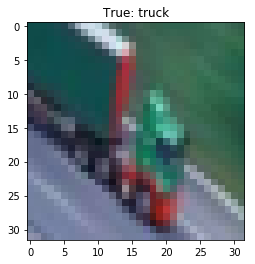

In [3]:
# check image

n = 50 # image number you want to see

img = img_train[n]
name = class_names[cls_train[n]]

img = img.reshape([32, 32, 3])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("True: {}".format(name))
ax.imshow(img)
plt.show()

In [4]:
# check size of data
print("\nSize of :        img, img_shape, cls_shape, labels_shape")
print('- Training-set:\t {}, {}, {}, {}'.format(len(img_train), img_train.shape, cls_train.shape, labels_train.shape))
print('- Test-set: \t {}, {}, {}, {}'.format(len(img_test), img_test.shape, cls_test.shape, labels_test.shape))


Size of :        img,   img_shape,         cls_shape, labels_shape
- Training-set:	 50000, (50000, 32, 32, 3), (50000,), (50000, 10)
- Test-set: 	 1024, (1024, 32, 32, 3), (1024,), (1024, 10)


## 3. model parameters

In [5]:
## widgets
# learning parameters
wg_lr = widgets.FloatSlider(value=0.001, min=1e-3, max=1., step=0.0001,
                            description="learning rate: ", readout=True, readout_format='0.4f')
wg_dp = widgets.FloatSlider(value=0.7, min=0.5, max=1., step=0.1,
                            description="drop out prob: ", readout=True)
# sizes
wg_es = widgets.IntSlider(value=10, min=5, max=500, step=5, 
                          description="epoch size: ", readout=True)
wg_bs = widgets.IntSlider(value=526, min=50, max=1000, step=1,
                          description="mini batch size: ", readout=True)
wg_fs = widgets.IntSlider(value=3, min=2, max=10, step=1,
                          description="filter size: ", readout=True)
# layers
wg_n_f = widgets.IntSlider(value=64, min=16, max=128, step=1,
                           description="num filters: ", readout=True)
wg_n_cl = widgets.IntSlider(value=3, min=2, max=5, step=1,
                            description="num conv layers: ", readout=True)
wg_n_hl = widgets.IntSlider(value=3, min=1, max=5, step=1,
                            description="num hidden layers: ", readout=True)
wg_n_hd = widgets.SelectionSlider(value=512, options=[128, 256, 512, 1024, 2048],
                                  description="hl dimension: ", readout=True)
# options initializer
wg_init = widgets.ToggleButton(value=False, button_style='success',
                                        description="Options initializer", disabled=False, icon='check')

def merged_widgets_model(lr, dp, es, bs, fs, nf, ncl, nhl, nhd):
    conv_nodes = [32, 64, 128, 256, 521, 1024]
    conv_nodes = conv_nodes[:ncl]
    return(lr, dp, es, bs, fs, nf, ncl, nhl, nhd, conv_nodes)

def init_parameters(value):
    if value:
        wg_lr.value = 0.001
        wg_dp.value = 0.7
        wg_es.value = 10
        wg_bs.value = 526
        wg_fs.value = 2
        wg_n_f.value = 64
        wg_n_cl.value = 3
        wg_n_hl.value = 3
        wg_n_hd.value = 526

        
merged_widget_model_cnn = interactive(merged_widgets_model, lr=wg_lr, dp=wg_dp, es=wg_es, bs=wg_bs, fs=wg_fs,\
                                      nf=wg_n_f, ncl=wg_n_cl, nhl=wg_n_hl, nhd=wg_n_hd)
widgets_init = interactive(init_parameters, value=wg_init)

display(merged_widget_model_cnn, widgets_init)

In [6]:
lr, prob, epoch_size, batch_size, filter_size, \
n_filter, n_conv_layers, n_hid_layers, n_hid_dim, conv_nodes = merged_widget_model_cnn.result

print("conv layers' nodes: ", conv_nodes)

conv layers' nodes:  [32, 64, 128]


## 4. Graphing

In [9]:
graph = tf.Graph()

with graph.as_default():

    # global step
    global_step = tf.Variable(0, name='global_step', trainable=False)

    # dropout probability
    keep_prob = tf.placeholder(dtype=tf.float32)

    #############################################
    # MODEL
    #############################################
    # input - conv1
    # conv1 - conv2 - ...
    # conv_last - fc_hid1
    # fc_hid1 - fc_hid2 - ...
    # fc_hid_last - output_layers : classifier
    #############################################

    
    #################
    # conv layers
    #################
    
    ## input to convolution layer 1
    with tf.name_scope("input_conv1"):
        # placeholder
        X = tf.placeholder(shape=[None, img_height, img_width, num_channels], dtype=tf.float32, name='X')
        Y = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='Y_true')
        Y_cls = tf.argmax(Y, dimension=1)
        # Variable
        W = tf.Variable(initial_value=utils.xavier_init([filter_size, filter_size, 3, conv_nodes[0]]), name='weight')
        b = tf.Variable(initial_value=utils.xavier_init([conv_nodes[0]]), name='bias')

        conv = tf.nn.conv2d(X, W, strides=[1, 1, 1, 1], padding='SAME')
        bias = tf.nn.bias_add(conv, b)  # not necessary

        output = tf.nn.relu(bias)

        pool = tf.nn.max_pool(output, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool')
        drop = tf.nn.dropout(pool, keep_prob=keep_prob)
        
        conv_img = tf.split(output, conv_nodes[0], 3)

        # summary
        tf.summary.histogram(name='input_conv1_weight', values=W)
        tf.summary.histogram(name='input_conv1_bias', values=b)
        tf.summary.image(name='input_conv1_image', tensor=conv_img, max_outputs=conv_nodes[0])
        for i in range(len(conv_img)):
            tf.summary.image(name="filterd_img_{}".format(i), tensor=conv_img[i])


    ## convolution layers
    for layer in range(1, n_conv_layers):
        with tf.name_scope("conv{}_conv{}".format(layer, layer+1)):
            # Weight and bias
            W = tf.Variable(initial_value=utils.xavier_init([filter_size, filter_size,
                                                             conv_nodes[layer-1], conv_nodes[layer]]), name='weight')
            b = tf.Variable(initial_value=utils.xavier_init([conv_nodes[layer]]), name='bias')
            # convolution
            conv = tf.nn.conv2d(drop, W, strides=[1, 1, 1, 1], padding='SAME')
            bias = tf.nn.bias_add(conv, b)

            output = tf.nn.relu(bias, name='conv')
            
            # max-pooling
            pool = tf.nn.max_pool(output, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pool')
            drop = tf.nn.dropout(pool, keep_prob=keep_prob, name='drop_output')

            # size, filter_img, conv_img = reformat_w(W, output)
            conv_img = tf.split(output, conv_nodes[layer], 3)

            # summary
            tf.summary.histogram(name='conv{}_conv{}_weight'.format(layer, layer+1), values=W)
            tf.summary.histogram(name='conv{}_conv{}_bias'.format(layer, layer+1), values=b)
            tf.summary.image(name='input_conv1_image', tensor=conv_img, max_outputs=conv_nodes[layer])
            for i in range(len(conv_img)):
                tf.summary.image(name="filterd_img_{}".format(i), tensor=conv_img[i])

                
    #################
    # fc layers (DNN)
    #################
    
    ## last convolution layer to fully connected layer1
    last_layer = n_conv_layers - 1
    with tf.name_scope("conv{}_fc1".format(last_layer)):

        ds = drop.get_shape().as_list()           # drop's shape
        fm_dim = ds[1]*ds[2]*ds[3]                # feature map dimension

        output_flat = tf.reshape(drop, shape=[-1, fm_dim])

        W = tf.Variable(initial_value=utils.xavier_init([fm_dim, n_hid_dim]), name='W')
        b = tf.Variable(initial_value=utils.xavier_init([n_hid_dim]), name='b')

        output = tf.nn.relu(tf.add(tf.matmul(output_flat, W), b), name='output2')
        drop = tf.nn.dropout(output, keep_prob=keep_prob)

        # summary
        tf.summary.histogram(name='conv{}_fc1_weight'.format(last_layer), values=W)
        tf.summary.histogram(name='conv{}_fc1_bias'.format(last_layer), values=b)

    
    ## fully connected - hidden layers
    for layer in range(1, n_hid_layers):
        with tf.name_scope("fc{}_fc{}".format(layer, layer+1)):
            W = tf.Variable(initial_value=utils.xavier_init([n_hid_dim, n_hid_dim]), name='W')
            b = tf.Variable(initial_value=utils.xavier_init([n_hid_dim]), name='b')

            output = tf.nn.relu(tf.add(tf.matmul(drop, W), b), name='output')
            drop = tf.nn.dropout(output, keep_prob=keep_prob)

            # summary
            tf.summary.histogram(name='fc{}_fc{}_weight'.format(layer, layer+1), values=W)
            tf.summary.histogram(name='fc{}_fc{}_bias'.format(layer, layer+1), values=b)

    ## fc output layer : classifier
    with tf.name_scope("fc_output_layer"):
        W = tf.Variable(initial_value=utils.xavier_init([n_hid_dim, 10]), name='W')
        b = tf.Variable(initial_value=utils.xavier_init([10]), name='b')

        logit = tf.add(tf.matmul(drop, W), b, name='logit')
        y_pred = tf.nn.softmax(logit, name='y_pred')

        tf.summary.histogram(name='fc_output_layer_weight', values=W)
        tf.summary.histogram(name='fc_output_layer_bias', values=b)


    #####################
    # training variables
    #####################

    ## loss
    with tf.name_scope("loss"):
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=Y, name='loss'))
        optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss, name='opt', global_step=global_step)

        # summary
        tf.summary.scalar(name='loss', tensor=loss)

    ## accuracy
    with tf.name_scope("accuracy"):
        predicted_label = tf.argmax(y_pred, axis=1, name='prediction')
        correct = tf.equal(tf.argmax(y_pred, 1), tf.argmax(Y, 1))
        accuracy_op = tf.reduce_mean(tf.cast(correct, tf.float32))

        # summary
        tf.summary.scalar(name='accuracy', tensor=accuracy_op)


    ## embedding
    with tf.name_scope("embedding"):
        # embedding setup
        embeddings = tf.Variable(initial_value=utils.xavier_init([1024, 10]), name="cifar10_embedding")
        embedding_update = tf.assign(ref=embeddings, value=logit, name="update")

        # variable initializer
        init = tf.global_variables_initializer()

        # writer & saver
        writer = tf.summary.FileWriter(LOG_DIR, graph=graph)
        saver = tf.train.Saver()

        # tensorboard's summaries & embedding
        merged_summ = tf.summary.merge_all()

        # embedding system (to visualize)
        config = projector.ProjectorConfig()
        embedding_config = config.embeddings.add()
        embedding_config.tensor_name = embeddings.name
        embedding_config.metadata_path = os.path.join(LOG_DIR, 'metadata.tsv')
        projector.visualize_embeddings(writer, config)


print("\nGraphing finished! Training starts ...\n")
print("===================================================")


Graphing finished! Training starts ...



## 5. tf.Session()

In [10]:
with tf.Session(graph=graph) as sess:

    ckpt = tf.train.get_checkpoint_state(LOG_DIR)

    # start running or load previous checkpoints
    if ckpt and tf.train.checkpoint_exists(LOG_DIR):
        print("Reading model parameters from %s" % ckpt.model_checkpoint_path)
        try:
            saver.restore(sess, ckpt.model_checkpoint_path)
            path = ckpt.model_checkpoint_path
            global_epoch = int(re.search(r"^\d+", path.split('_')[3]).group(0))
            global_step_pre = int(path.split('-')[-1])
            batch_start = int(global_step_pre / (global_epoch + 1))
        except:
            print("\nError on loading old network weights")

    else:
        print("Created model with fresh parameters ...")
        sess.run(init)
        global_epoch = 0
        batch_start = 0

    num_batches_per_epoch = int(np.ceil(len(img_train)/ batch_size))

    # traning starts
    for epoch in range(global_epoch, epoch_size):

        total_loss = 0
        generator = utils.generate_batch(img_train, labels_train, batch_size)

        for batch in range(batch_start, num_batches_per_epoch):
            x, y = next(generator)

            local_loss, _, step = sess.run([loss, optimizer, global_step], feed_dict={X:x, Y:y, keep_prob:prob})
            total_loss += local_loss

            if step % 10==0 :
                # summary
                summary = sess.run(merged_summ, feed_dict={X: x, Y: y, keep_prob: prob})
                writer.add_summary(summary=summary, global_step=step)

                # save
                saver.save(sess, os.path.join(LOG_DIR, 'cnn_cifar10_{}.ckpt'.format(epoch)), global_step=step)
                print("global step : {}, model saved.".format(step))

        batch_start = 0
        accuracy, _ = sess.run([accuracy_op, embedding_update], feed_dict={X:img_test, Y:labels_test, keep_prob:1.0})
        total_loss = total_loss/(num_batches_per_epoch - batch_start)
        print(" epoch: {}/{}, loss: {}, accuracy: {}".format(epoch+1, epoch_size, total_loss, accuracy))


    # final accuracy with test data
    accuracy, _ = sess.run([accuracy_op, embedding_update], feed_dict={X:img_test, Y:labels_test, keep_prob:1.0})

    print("===================================================")
    print("Training finished! Accuaracy: {}".format(accuracy))

Reading model parameters from /Users/yangsoyoung/Desktop/tensor/cnn_summary/cnn_cifar10.ckpt-2
INFO:tensorflow:Restoring parameters from /Users/yangsoyoung/Desktop/tensor/cnn_summary/cnn_cifar10.ckpt-2
 epoch: 3/10, loss: 2.308974713087082
 epoch: 4/10, loss: 2.309422547618548


KeyboardInterrupt: 

## 6. Plot test image

In [23]:
def plot_result(show_test_sample_size):
    orders = np.random.choice(len(img_test), show_test_sample_size)
    
    with tf.Session(graph=graph) as sess:
        ckpt = tf.train.get_checkpoint_state(LOG_DIR)
        saver.restore(sess, ckpt.model_checkpoint_path)
        
        predicted = sess.run(predicted_label, feed_dict={X:img_test, Y:labels_test, keep_prob:1.0})
    
    for i, n in enumerate(orders):
        data = img_test[n]
        target_label = int(cls_test[n])
        pred_label = int(predicted[n])
        
        pixels = data.reshape([32, 32, 3])
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(show_test_sample_size, 1, i+1)
        ax.set_title("Predicts: {}\nTrue: {}".format(class_names[pred_label], class_names[target_label]))
        ax.imshow(pixels)
    plt.show()

INFO:tensorflow:Restoring parameters from /Users/yangsoyoung/Desktop/tensor/cnn_summary/cnn_cifar10.ckpt-3


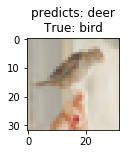

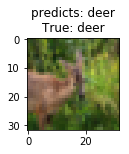

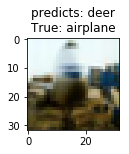

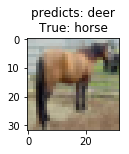

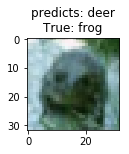

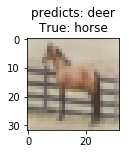

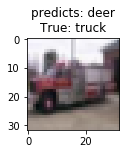

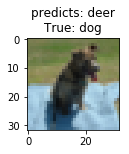

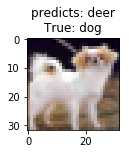

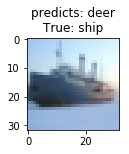

In [24]:
plot_result(10)